In [2]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import os
import random
from pprint import pprint

In [3]:
file_path = os.path.join("..", "Resources", "Redfin_CrimeMergeDataset.csv")
housingCrimeDF = pd.read_csv(file_path)
print(f"Data Shape: {housingCrimeDF.shape}")
housingCrimeDF.head()

Data Shape: (70, 12)


,City,Year,Population,Violent Crime,Property Crime,Total Crime,"Total Crime Per Capita [10,000]","Violent Crime Per Capita [10,000]","Property Crime Per Capita [10,000]",Median Sale Price,DOM,Homes Sold
0,Baytown,2012,74420.0,247.0,3684.0,3931.0,528.218221,33.190003,495.028218,116000.000000,75.500000,885
1,Friendswood,2012,36965.0,15.0,353.0,368.0,99.553632,4.057893,95.495739,184916.666667,80.583333,770
2,Galveston,2012,49170.0,296.0,2469.0,2765.0,562.334757,60.199309,502.135448,152083.333333,84.333333,854
3,Houston,2012,2177273.0,21610.0,107678.0,129288.0,593.807024,99.252597,494.554427,150916.666667,56.250000,26981
4,La Porte,2012,35054.0,61.0,604.0,665.0,189.707309,17.401723,172.305586,103416.666667,67.666667,356


In [5]:
#build crime random sample for Houston

x_listHouston = housingCrimeDF.loc[(housingCrimeDF["City"] == 'Houston'), ['Total Crime Per Capita [10,000]']]

crimeRandomSampleHouston = []


for index, item in x_listHouston.iterrows() :    
    limit = 0.5 * item['Total Crime Per Capita [10,000]']
    lowLimit = item['Total Crime Per Capita [10,000]'] - limit
    upperLimit = item['Total Crime Per Capita [10,000]'] + limit
    
    for i in range (1,25) : 
        if (i%2 == 0) :
            x = round(random.uniform(lowLimit, item['Total Crime Per Capita [10,000]'] ),1)
        else :
            x = round(random.uniform(item['Total Crime Per Capita [10,000]'], upperLimit ),2)
        crimeRandomSampleHouston.append(x)

# previousItem = 0.0 
# for index, item in x_listHouston.iterrows() :
#     for i in range (1,20) :
#         if (item['Total Crime Per Capita [10,000]'] < (previousItem)) :
#             x = round(random.uniform(item, previousItem ),2)
#         else :
#             x = round(random.uniform(previousItem, item ),2)
#         crimeRandomSampleHouston.append(x * 1.0)
#         previousitem = x


crimeRandomSampleHoustondf = pd.DataFrame(crimeRandomSampleHouston, columns = ['Total Crime Per Capita [10,000]'])

crimeRandomSampleHoustondf
        

,"Total Crime Per Capita [10,000]"
0,840.96
1,563.10
2,825.20
3,431.60
4,876.63
...,...
163,466.80
164,673.92
165,271.60
166,555.58


In [6]:
#build price bin samples for values friendswood 

y_listHouston = housingCrimeDF.loc[(housingCrimeDF["City"] == 'Houston'), ['Homes Sold', 'Population']]
y_listHouston['Homes Sold'] = (y_listHouston['Homes Sold'] / y_listHouston['Population']) * 10000

houstonRandomSample = []

for index, item in y_listHouston.iterrows() :    
    limit = 0.5 * item['Homes Sold']
    lowLimit = item['Homes Sold'] - limit
    upperLimit = item['Homes Sold'] + limit
    
    for i in range (1,25) : 
        if (i%2 == 0) :
            x = round(random.uniform(lowLimit, item['Homes Sold'] ),2)
        else :
            x = round(random.uniform(item['Homes Sold'], upperLimit ),2)
        houstonRandomSample.append(x)


# previousItem = 0 
# for index, item in y_listHouston.iterrows() :
#     for i in range (1,20) :
#         if (item['Homes Sold'] < (previousItem)) :
#             x = round(random.uniform(item['Homes Solds'], previousItem ),2)
#         else :
#             x = round(random.uniform(previousItem, item['Homes Sold'] ),2)
#         houstonRandomSample.append(x * 1.0)
#         previousitem = x

crimeRandomSampleHoustondf['Homes Sold']  = houstonRandomSample

crimeRandomSampleHoustondf.head()

,"Total Crime Per Capita [10,000]",Homes Sold
0,840.96,132.35
1,563.10,62.62
2,825.20,137.81
3,431.60,97.50
4,876.63,165.35


In [9]:
#build crime random sample for Friendswood

x_listFriendswood = housingCrimeDF.loc[(housingCrimeDF["City"] == 'Friendswood'), ['Total Crime Per Capita [10,000]']]

crimeRandomSampleFriendswood = []


for index, item in x_listFriendswood.iterrows() :    
    limit = 0.5 * item['Total Crime Per Capita [10,000]']
    lowLimit = item['Total Crime Per Capita [10,000]'] - limit
    upperLimit = item['Total Crime Per Capita [10,000]'] + limit
    
    for i in range (1,25) : 
        if (i%2 == 0) :
            x = round(random.uniform(lowLimit, item['Total Crime Per Capita [10,000]'] ),2)
        else :
            x = round(random.uniform(item['Total Crime Per Capita [10,000]'], upperLimit ),2)
        crimeRandomSampleFriendswood.append(x)

crimeRandomSampleFriendswooddf = pd.DataFrame(crimeRandomSampleFriendswood, columns = ['Total Crime Per Capita [10,000]'])

crimeRandomSampleFriendswooddf
           
        

,"Total Crime Per Capita [10,000]"
0,123.58
1,81.70
2,124.15
3,92.81
4,115.30
...,...
163,47.63
164,127.71
165,57.54
166,103.09


In [11]:
#build price bin samples for values houston 

y_listFriendswood = housingCrimeDF.loc[(housingCrimeDF["City"] == 'Friendswood'), ['Homes Sold', 'Population']]
y_listFriendswood['Homes Sold'] = (y_listFriendswood['Homes Sold'] / y_listFriendswood['Population']) * 10000

friendswoodRandomSample = []

for index, item in y_listFriendswood.iterrows() :    
    limit = 0.5 * item['Homes Sold']
    lowLimit = item['Homes Sold'] - limit
    upperLimit = item['Homes Sold'] + limit
    
    for i in range (1,25) : 
        if (i%2 == 0) :
            x = round(random.uniform(lowLimit, item['Homes Sold'] ),2)
        else :
            x = round(random.uniform(item['Homes Sold'], upperLimit ),2)
        friendswoodRandomSample.append(x)


len (friendswoodRandomSample)    


crimeRandomSampleFriendswooddf['Homes Sold']  = friendswoodRandomSample

crimeRandomSampleFriendswooddf.head()

,"Total Crime Per Capita [10,000]",Homes Sold
0,123.58,219.32
1,81.70,156.86
2,124.15,296.09
3,92.81,143.41
4,115.30,310.39


In [12]:
#build crime random sample for Friendswood

x_listSugarLand = housingCrimeDF.loc[(housingCrimeDF["City"] == 'Sugar Land'), ['Total Crime Per Capita [10,000]']]

crimeRandomSampleSugarLand = []

for index, item in x_listSugarLand.iterrows() :    
    limit = 0.5 * item['Total Crime Per Capita [10,000]']
    lowLimit = item['Total Crime Per Capita [10,000]'] - limit
    upperLimit = item['Total Crime Per Capita [10,000]'] + limit
    
    for i in range (1,25) : 
        if (i%2 == 0) :
            x = round(random.uniform(lowLimit, item['Total Crime Per Capita [10,000]'] ),2)
        else :
            x = round(random.uniform(item['Total Crime Per Capita [10,000]'], upperLimit ),2)
        crimeRandomSampleSugarLand.append(x)
        
# previousItem = 0.0 
# for index, item in x_listSugarLand.iterrows() :
#     for i in range (1,20) :
#         if (item['Total Crime Per Capita [10,000]'] < (previousItem)) :
#             x = round(random.uniform(item, previousItem ),2)
#         else :
#             x = round(random.uniform(previousItem, item ),2)
#         crimeRandomSampleSugarLand.append(x * 1.0)
#         previousitem = x

crimeRandomSampleSugarLanddf = pd.DataFrame(crimeRandomSampleSugarLand, columns = ['Total Crime Per Capita [10,000]'])

crimeRandomSampleSugarLanddf
           
        

,"Total Crime Per Capita [10,000]"
0,278.27
1,108.90
2,279.11
3,147.91
4,241.66
...,...
163,86.49
164,211.59
165,107.87
166,219.28


In [13]:
#build price bin samples for values houston 

y_listSugarLand = housingCrimeDF.loc[(housingCrimeDF["City"] == 'Sugar Land'), ['Homes Sold', 'Population']]
y_listSugarLand['Homes Sold'] = (y_listSugarLand['Homes Sold'] / y_listSugarLand['Population']) * 10000

sugarlandRandomSample = []

for index, item in y_listSugarLand.iterrows() :    
    limit = 0.5 * item['Homes Sold']
    lowLimit = item['Homes Sold'] - limit
    upperLimit = item['Homes Sold'] + limit
    
    for i in range (1,25) : 
        if (i%2 == 0) :
            x = round(random.uniform(lowLimit, item['Homes Sold'] ),2)
        else :
            x = round(random.uniform(item['Homes Sold'], upperLimit ),2)
        sugarlandRandomSample.append(x)

len (sugarlandRandomSample)    


crimeRandomSampleSugarLanddf['Homes Sold']  = sugarlandRandomSample
crimeRandomSampleSugarLanddf.head()

,"Total Crime Per Capita [10,000]",Homes Sold
0,278.27,347.92
1,108.90,171.50
2,279.11,260.77
3,147.91,129.49
4,241.66,323.45


The r for Houston is: 0.6884151388367336
The r for Friendswood  is: 0.708637556182836
The r for Sugar Land  is: 0.7516295863908455


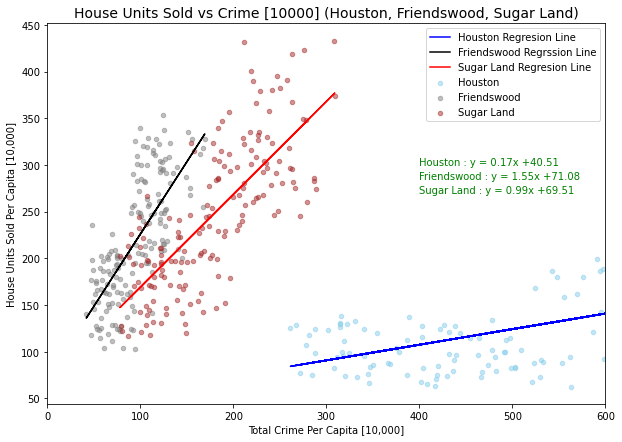

In [15]:


# Perform a linear regression on crime vs units sold
(slopeH, interceptH, rvalueH, pvalueH, stderrH) = stats.linregress(crimeRandomSampleHoustondf['Total Crime Per Capita [10,000]'], crimeRandomSampleHoustondf['Homes Sold'] )
# Get regression values
regress_valuesHouston = crimeRandomSampleHoustondf['Total Crime Per Capita [10,000]'] * slopeH + interceptH

 # Create line equation string
line_eqH = "Houston : y = " + str(round(slopeH,2)) + "x +" + str(round(interceptH,2))


# Perform a linear regression on crime  vs units sold
(slopeF, interceptF, rvalueF, pvalueF, stderrF) = stats.linregress(crimeRandomSampleFriendswooddf['Total Crime Per Capita [10,000]'], crimeRandomSampleFriendswooddf['Homes Sold'])
# Get regression values
regress_valuesFriendswood = crimeRandomSampleFriendswooddf['Total Crime Per Capita [10,000]'] * slopeF + interceptF
 # Create line equation string
line_eqF = "Friendswood : y = " + str(round(slopeF,2)) + "x +" + str(round(interceptF,2))


# Perform a linear regression on temperature  vs units sold
(slopeS, interceptS, rvalueS, pvalueS, stderrS) = stats.linregress(crimeRandomSampleSugarLanddf['Total Crime Per Capita [10,000]'], crimeRandomSampleSugarLanddf['Homes Sold'])
# Get regression values
regress_valuesSugarLand = crimeRandomSampleSugarLanddf['Total Crime Per Capita [10,000]'] * slopeS + interceptS
 # Create line equation string
line_eqS = "Sugar Land : y = " + str(round(slopeS,2)) + "x +" + str(round(interceptS,2))



# Create Plot
ax1 = crimeRandomSampleHoustondf.plot(kind='scatter', x='Total Crime Per Capita [10,000]', y='Homes Sold', color ='skyblue',  alpha=0.5, figsize=(10, 7))

crimeRandomSampleFriendswooddf.plot(kind='scatter', x='Total Crime Per Capita [10,000]', y='Homes Sold', color ='grey', alpha=0.5, figsize=(10, 7),  ax=ax1)
crimeRandomSampleSugarLanddf.plot(kind='scatter', x='Total Crime Per Capita [10,000]', y='Homes Sold', color ='brown', alpha=0.5, figsize=(10, 7),  ax=ax1)

plt.plot(crimeRandomSampleHoustondf['Total Crime Per Capita [10,000]'],regress_valuesHouston,"b-")
plt.plot(crimeRandomSampleFriendswooddf['Total Crime Per Capita [10,000]'],regress_valuesFriendswood,"k-")
plt.plot(crimeRandomSampleSugarLanddf['Total Crime Per Capita [10,000]'],regress_valuesSugarLand,"r-")


plt.text(400,300,line_eqH, fontsize=10,color="green")
plt.text(400,285,line_eqF, fontsize=10,color="green")
plt.text(400,270,line_eqS, fontsize=10,color="green")

print(f"The r for Houston is: {rvalueH}")
print(f"The r for Friendswood  is: {rvalueF}")
print(f"The r for Sugar Land  is: {rvalueS}")

# legend, title and labels.
plt.legend(labels=['Houston Regresion Line', 'Friendswood Regrssion Line', 'Sugar Land Regresion Line', 'Houston', 'Friendswood', 'Sugar Land'])
#plt.legend(labels=['Houston Regression Line', 'Sugar Land Regression Line', 'Houston', 'Sugar Land'])
plt.title('House Units Sold vs Crime [10000] (Houston, Friendswood, Sugar Land)', size=14)
plt.xlabel('Total Crime Per Capita [10,000]')
plt.ylabel('House Units Sold Per Capita [10,000]');
plt.xlim(0,600)

# Save the plotted figures as .pngs
output_path = os.path.join("..", "Images", "Crime and Units Sold for Houston,Friendswood and Sugarland.png")
plt.savefig(output_path)

#show the graph
plt.show()

The r for Houston is: 0.6884151388367336
The r for Sugar Land  is: 0.7516295863908455


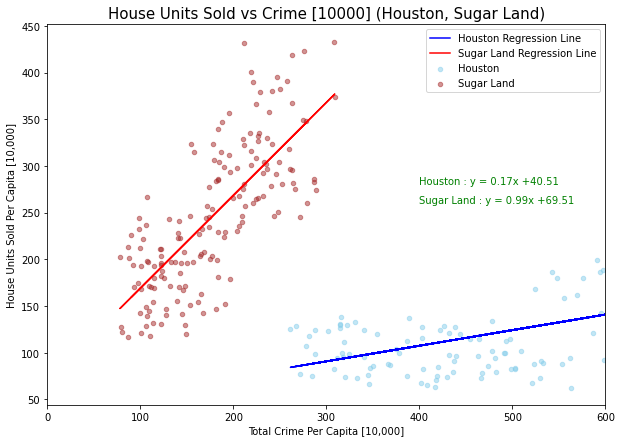

In [16]:


# Perform a linear regression on crime vs units sold
(slopeH, interceptH, rvalueH, pvalueH, stderrH) = stats.linregress(crimeRandomSampleHoustondf['Total Crime Per Capita [10,000]'], crimeRandomSampleHoustondf['Homes Sold'] )
# Get regression values
regress_valuesHouston = crimeRandomSampleHoustondf['Total Crime Per Capita [10,000]'] * slopeH + interceptH

 # Create line equation string
line_eqH = "Houston : y = " + str(round(slopeH,2)) + "x +" + str(round(interceptH,2))


# # Perform a linear regression on crime  vs units sold
# (slopeF, interceptF, rvalueF, pvalueF, stderrF) = stats.linregress(crimeRandomSampleFriendswooddf['Total Crime Per Capita [10,000]'], crimeRandomSampleFriendswooddf['Homes Sold'])
# # Get regression values
# regress_valuesFriendswood = crimeRandomSampleFriendswooddf['Total Crime Per Capita [10,000]'] * slopeF + interceptF
#  # Create line equation string
# line_eqF = "Friendswood : y = " + str(round(slopeF,2)) + "x +" + str(round(interceptF,2))


# Perform a linear regression on temperature  vs units sold
(slopeS, interceptS, rvalueS, pvalueS, stderrS) = stats.linregress(crimeRandomSampleSugarLanddf['Total Crime Per Capita [10,000]'], crimeRandomSampleSugarLanddf['Homes Sold'])
# Get regression values
regress_valuesSugarLand = crimeRandomSampleSugarLanddf['Total Crime Per Capita [10,000]'] * slopeS + interceptS
 # Create line equation string
line_eqS = "Sugar Land : y = " + str(round(slopeS,2)) + "x +" + str(round(interceptS,2))



# Create Plot
ax1 = crimeRandomSampleHoustondf.plot(kind='scatter', x='Total Crime Per Capita [10,000]', y='Homes Sold', color ='skyblue',  alpha=0.5, figsize=(10, 7))

#crimeRandomSampleFriendswooddf.plot(kind='scatter', x='Total Crime Per Capita [10,000]', y='Homes Sold', color ='grey', alpha=0.5, figsize=(10, 7),  ax=ax1)
crimeRandomSampleSugarLanddf.plot(kind='scatter', x='Total Crime Per Capita [10,000]', y='Homes Sold', color ='brown', alpha=0.5, figsize=(10, 7),  ax=ax1)

plt.plot(crimeRandomSampleHoustondf['Total Crime Per Capita [10,000]'],regress_valuesHouston,"b-")
#plt.plot(crimeRandomSampleFriendswooddf['Total Crime Per Capita [10,000]'],regress_valuesFriendswood,"k-")
plt.plot(crimeRandomSampleSugarLanddf['Total Crime Per Capita [10,000]'],regress_valuesSugarLand,"r-")


plt.text(400,280,line_eqH, fontsize=10,color="green")
#plt.text(400,280,line_eqF, fontsize=10,color="green")
plt.text(400,260,line_eqS, fontsize=10,color="green")





print(f"The r for Houston is: {rvalueH}")
#print(f"The r for Friendswood  is: {rvalueF}")
print(f"The r for Sugar Land  is: {rvalueS}")

# legend, title and labels.
#plt.legend(labels=['Houston Regresion Line', 'Friendswood', 'Sugar Land Regresion Line', 'Houston', 'Friendswood', 'Sugar Land'])
plt.legend(labels=['Houston Regression Line', 'Sugar Land Regression Line', 'Houston', 'Sugar Land'])
plt.title('House Units Sold vs Crime [10000] (Houston, Sugar Land)', size=15)
plt.xlabel('Total Crime Per Capita [10,000]')
plt.ylabel('House Units Sold Per Capita [10,000]');
plt.xlim(0,600)

# Save the plotted figures as .pngs
output_path = os.path.join("..", "Images", "Crime and Units Sold for Houston and Sugarland.png")
plt.savefig(output_path)

#show the graph
plt.show()